Test


In [ ]:
# general lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
df = pd.read_csv("BBCA.csv")

df1 = df.iloc[4882:5145]
print(df1.head())
print(df1.tail())

       timestamp  open   low  high  close    volume
4882  2020-01-01  6680  6670  6720   6685         0
4883  2020-01-02  6695  6680  6780   6690  49445000
4884  2020-01-03  6750  6725  6800   6800  47755500
4885  2020-01-06  6720  6690  6750   6735  27300000
4886  2020-01-07  6735  6730  6770   6740  45022500
       timestamp  open   low  high  close    volume
5140  2020-12-28  6790  6660  6820   6780  60234000
5141  2020-12-29  6775  6740  6810   6765  34212500
5142  2020-12-30  6800  6700  6800   6770  52675500
5143  2020-12-31  6800  6700  6800   6770         0
5144  2021-01-01  6800  6700  6800   6770         0


In [ ]:
df_pakai = df1['close']
print(df_pakai)

4882    6685
4883    6690
4884    6800
4885    6735
4886    6740
        ... 
5140    6780
5141    6765
5142    6770
5143    6770
5144    6770
Name: close, Length: 263, dtype: int64


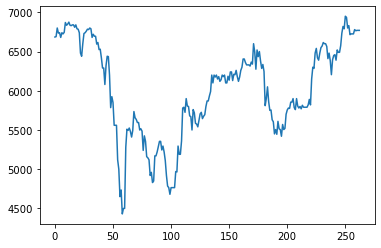

In [ ]:
x = []
i = 0
while i < 263:
    x.append(i)
    i += 1
plt.plot(x, df_pakai)
plt.show()

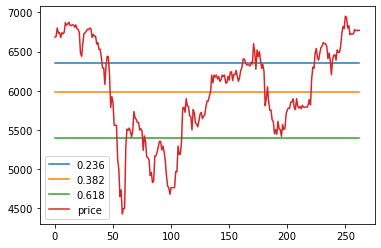

In [ ]:
# pembatas pp
level_1 = max(df_pakai) - 0.236*(max(df_pakai) - min(df_pakai))
level_2 = max(df_pakai) - 0.382*(max(df_pakai) - min(df_pakai))
level_3 = max(df_pakai) - 0.618*(max(df_pakai) - min(df_pakai))

lv1 = []
lv2 = []
lv3 = []

i = 0
while i < 263:
    lv1.append(level_1)
    lv2.append(level_2)
    lv3.append(level_3)
    i += 1

plt.plot(x, lv1)
plt.plot(x, lv2)
plt.plot(x, lv3, label = 'fibonacci line')
plt.plot(x, df_pakai)
plt.legend(['0.236', '0.382', '0.618', 'price'], loc = "best")
plt.show()

In [ ]:
print(df_pakai)
haha = df_pakai.values.tolist()
print(haha)

4882    6685
4883    6690
4884    6800
4885    6735
4886    6740
        ... 
5140    6780
5141    6765
5142    6770
5143    6770
5144    6770
Name: close, Length: 263, dtype: int64
[6685, 6690, 6800, 6735, 6740, 6680, 6740, 6725, 6745, 6870, 6835, 6850, 6875, 6835, 6830, 6840, 6840, 6810, 6840, 6790, 6785, 6740, 6480, 6440, 6600, 6730, 6740, 6760, 6785, 6780, 6800, 6790, 6680, 6720, 6695, 6695, 6595, 6615, 6525, 6530, 6420, 6290, 6290, 6080, 6320, 6440, 6435, 6200, 5785, 5925, 5850, 5560, 5560, 5560, 5120, 5000, 4650, 4735, 4430, 4500, 4500, 5280, 5510, 5495, 5525, 5480, 5410, 5495, 5735, 5655, 5635, 5595, 5595, 5500, 5515, 5485, 5240, 5425, 5355, 5160, 5145, 5120, 4920, 4960, 4830, 4850, 5170, 5170, 5220, 5285, 5355, 5355, 5245, 5295, 5220, 5110, 4920, 4785, 4765, 4680, 4765, 4765, 4765, 4765, 4970, 4965, 5295, 5190, 5190, 5360, 5780, 5790, 5725, 5900, 5805, 5800, 5680, 5670, 5500, 5760, 5720, 5585, 5575, 5540, 5620, 5705, 5725, 5645, 5675, 5695, 5800, 5870, 5870, 5935, 5990, 6200, 6

Decision: 23.636525218874297


C:\Users\Rafi\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rafi\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


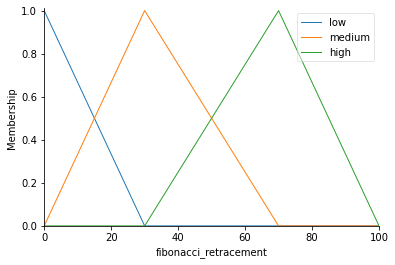

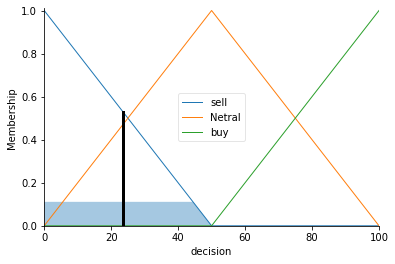

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# Create the fuzzy variables and membership functions
fibonacci_retracement = ctrl.Antecedent(np.arange(0, 101, 1), 'fibonacci_retracement')
regression = ctrl.Antedecent(np.arrange())
decision = ctrl.Consequent(np.arange(0, 101, 1), 'decision')
# Define the membership functions for the variables
fibonacci_retracement['low'] = fuzz.trimf(fibonacci_retracement.universe, [0, 0, 30])
fibonacci_retracement['medium'] = fuzz.trimf(fibonacci_retracement.universe, [0, 30, 70])
fibonacci_retracement['high'] = fuzz.trimf(fibonacci_retracement.universe, [30, 70, 100])
decision['sell'] = fuzz.trimf(decision.universe, [0, 0, 50])
decision['Netral'] = fuzz.trimf(decision.universe, [0, 50, 100])
decision['buy'] = fuzz.trimf(decision.universe, [50, 100, 100])
# Define the fuzzy rules
rules = [
    ctrl.Rule(fibonacci_retracement['low'], decision['buy']),
    ctrl.Rule(fibonacci_retracement['medium'], decision['Netral']),
    ctrl.Rule(fibonacci_retracement['high'], decision['sell'])
]
# Create the fuzzy control system
decision_ctrl = ctrl.ControlSystem(rules)
decision_calc = ctrl.ControlSystemSimulation(decision_ctrl)
# Pass inputs and compute the decision
decision_calc.input['fibonacci_retracement'] = abs(haha[-1]-0.618*(max(df_pakai) - min(df_pakai)))/level_3*100# persentase selisih dari retracement
# Compute the decision
decision_calc.compute()
# Print the output
print("Decision:", decision_calc.output['decision'])
# Visualize the membership functions and the output
fibonacci_retracement.view()
decision.view(sim=decision_calc)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Generate random stock data
data = np.random.randn(50)

# Create a time series
dates = pd.date_range('2023-01-01', periods=50, freq='D')

# Create a DataFrame
df = pd.DataFrame({'Date': dates, 'Close': data})

# Define the function to plot the current frame
def animate(i):
    # Select the data for the current frame
    current_data = df[:i+1]

    # Plot the time series
    ax.cla()
    ax.plot(current_data['Date'], current_data['Close'])
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlim(current_data['Date'].min(), current_data['Date'].max())
    ax.set_xlabel('Date', ha='right')  # Tilt the x-axis title
    ax.set_ylabel('Close')
    ax.set_title('Random Stock Data')

# Create a Matplotlib figure and axes
fig, ax = plt.subplots()

# Create a FuncAnimation object
animation = FuncAnimation(fig, animate, frames=len(df), interval=100)

# Save the animation as a GIF
animation.save('increasing_x_axis_tilted_title.gif', dpi=80, writer='imagemagick')

In [ ]:
abs(haha[-1]-0.618*(max(df_pakai) - min(df_pakai)))/level_3*100

96.66211725611204

In [ ]:
#pembatas rajab

In [ ]:
df1['']['2020-01-01':'2021-01-01'].max()

KeyError: ''

In [ ]:
df1['Price']['2020-01-01':'2018-04-01'].min()

In [ ]:
Diff = Price_Max-Price_Min

In [ ]:
level1 = Price_Max - 0.236 * Diff
level2 = Price_Max - 0.382 * Diff
level3 = Price_Max - 0.618 * Diff

In [ ]:
# Create the fuzzy variables and membership functions
food_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'food_quality')
service_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'service_quality')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')
# Define the membership functions for the variables
food_quality['poor'] = fuzz.trimf(food_quality.universe, [0, 0, 5])
food_quality['average'] = fuzz.trimf(food_quality.universe, [0, 5, 10])
food_quality['excellent'] = fuzz.trimf(food_quality.universe, [5, 10, 10])
service_quality['poor'] = fuzz.trimf(service_quality.universe, [0, 0, 5])
service_quality['average'] = fuzz.trimf(service_quality.universe, [0, 5, 10])
service_quality['excellent'] = fuzz.trimf(service_quality.universe, [5, 10, 10])
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])
# Define the fuzzy rules
rules = [
    ctrl.Rule(food_quality['poor'] | service_quality['poor'], tip['low']),
    ctrl.Rule(service_quality['average'] | service_quality['average'], tip['medium']),
    ctrl.Rule(service_quality['excellent'] | food_quality['excellent'], tip['high'])
]
# Create the fuzzy control system
tip_ctrl = ctrl.ControlSystem(rules)
tip_calc = ctrl.ControlSystemSimulation(tip_ctrl)
# Pass inputs and compute the tip
tip_calc.input['food_quality'] = 6.5
tip_calc.input['service_quality'] = 9.8
# Compute the tipping percentage
tip_calc.compute()
# Print the output
print("Tipping percentage:", tip_calc.output['tip'])
# Visualize the membership functions and the output
food_quality.view()
service_quality.view()
tip.view(sim=tip_calc)